### **Import the necessary packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image, ImageOps
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, Dense, Flatten

### **Load the data**

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### **Data Analysis**

In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


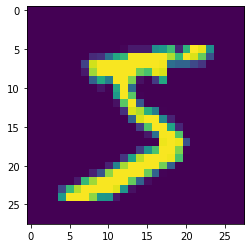

In [6]:
plt.imshow(x_train[0])

### **Data Pre-Processing**

In [7]:
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32')
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32')

In [8]:
n_classes = 10
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### **Create model**

In [10]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(n_classes, activation="softmax"))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

### **Train the model**

In [12]:
model.fit(x_train, y_train, batch_size=256, epochs=7, validation_data=(x_test, y_test))

Epoch 1/5
235/235 [==============================] - 175s 740ms/step - loss: 0.7684 - accuracy: 0.9143 - val_loss: 0.0931 - val_accuracy: 0.9711
Epoch 2/5
235/235 [==============================] - 171s 727ms/step - loss: 0.0725 - accuracy: 0.9778 - val_loss: 0.0719 - val_accuracy: 0.9777
Epoch 3/5
235/235 [==============================] - 173s 735ms/step - loss: 0.0449 - accuracy: 0.9855 - val_loss: 0.0714 - val_accuracy: 0.9779
Epoch 4/5
235/235 [==============================] - 174s 742ms/step - loss: 0.0327 - accuracy: 0.9892 - val_loss: 0.0895 - val_accuracy: 0.9755
Epoch 5/5
235/235 [==============================] - 172s 732ms/step - loss: 0.0262 - accuracy: 0.9914 - val_loss: 0.0888 - val_accuracy: 0.9782


### **Test the model**

In [13]:
metrics = model.evaluate(x_test, y_test, verbose=0)
print(f"Metrics (Test Loss & Test Accuracy): {metrics}")

Metrics (Test Loss & Test Accuracy): 
[0.08877503126859665, 0.9782000184059143]


In [14]:
pred = model.predict(x_test[:4])
print(pred)

1/1 [==============================] - 0s 91ms/step
[[4.14340090e-12 6.20706896e-14 7.47722684e-09 7.48266059e-04
  7.69512386e-16 1.13207160e-15 7.85414424e-16 9.99251664e-01
  1.05309930e-08 9.48492951e-10]
 [2.75578440e-08 2.81768121e-06 9.99994278e-01 4.28325848e-07
  3.45381254e-12 7.03106367e-12 8.00472208e-07 5.98686398e-08
  1.60768025e-06 1.48204592e-14]
 [5.86631404e-06 9.57506180e-01 6.22565160e-03 5.85102100e-08
  3.87271633e-03 7.67376434e-07 4.03024387e-06 2.86956110e-05
  3.23554352e-02 6.50562527e-07]
 [9.99993205e-01 9.85164294e-12 2.15250407e-06 7.47123127e-11
  1.90717375e-09 1.48108255e-08 7.36817924e-07 4.06140117e-08
  3.77435327e-07 3.56820578e-06]]


In [17]:
print(np.argmax(pred, axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### **Save the model**

In [18]:
model.save("model.h5")

### **Test the saved model**

In [19]:
model=load_model("model.h5")

In [24]:
img = Image.open("/content/sample_data/sample.png").convert("L")
img = np.array(img).reshape(1, 28, 28, 1)

res  = model.predict(img)
res = np.argmax(res, axis = 1)
res = pd.Series(res, name="Label")
print(res)

1/1 [==============================] - 0s 19ms/step
0    8
Name: Label, dtype: int64
